# NYC Weather Transportation Study

This study examines weather conditions in New York City and how it affects taxi service transportation.

In [64]:
import warnings
warnings.filterwarnings("ignore")

import numpy as np
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab

import seaborn as sns

%matplotlib inline
mpl.style.use( 'ggplot' )
sns.set_style( 'white' )
pylab.rcParams[ 'figure.figsize' ] = 8, 6

In [65]:
def plot_correlation_map( df ):
    corr = df.corr()
    _, ax = plt.subplots( figsize = (12,10) )
    cmap = sns.diverging_palette( 220, 10, as_cmap=True )
    _ = sns.heatmap(
        corr,
        cmap=cmap,
        square=True,
        cbar_kws= {'shrink': .9},
        ax = ax,
        annot=True,
        annot_kws= {'fontsize': 12}
    )

In [66]:
fname_weather = "Datasets/Wunderground/Monthly_Weather_Raw_JFK_Updated.csv"
fname_stats = "Datasets/new_stats.csv"

weather = pd.read_csv(fname_weather)
stats = pd.read_csv(fname_stats)

weather.drop('Month', axis=1, inplace=True)
weather.drop('Day', axis=1, inplace=True)
weather.drop('Sea Level Press. (in) - Max', axis=1, inplace=True)
weather.drop('Sea Level Press. (in) - Min', axis=1, inplace=True)
weather.drop('Temp. (Degrees F) - Max', axis=1, inplace=True)
weather.drop('Temp. (Degrees F) - Min', axis=1, inplace=True)
weather.drop('Humidity (%) - Max', axis=1, inplace=True)
weather.drop('Humidity (%) - Min', axis=1, inplace=True)
weather.drop('Visibility (mi) - Max', axis=1, inplace=True)
weather.drop('Visibility (mi) - Min', axis=1, inplace=True)
weather.drop('Wind (mph) - Max', axis=1, inplace=True)
weather.drop('Wind (mph) - Max?!?', axis=1, inplace=True)


frames = [stats, weather]
result = pd.concat(frames, axis=1)
result.drop('Event', axis=1, inplace=True)
#result.drop('Date', axis=1, inplace=True)

In [67]:
weather.head()

,Temp. (Degrees F) - Avg,Dew Point (Degrees F) - Max,Dew Point (Degrees F) - Avg,Dew Point (Degrees F) - Min,Humidity (%) - Avg,Sea Level Press. (in) - Avg,Visibility (mi) - Avg,Wind (mph) - Avg,Precipitation (in) - Sum,Event
0,40,28,24,18,50,30.04,10,15,0.0,NaN
1,38,22,19,17,47,30.04,10,13,0.0,NaN
2,42,27,23,21,49,29.88,10,14,0.0,NaN
3,27,25,10,-1,44,30.05,10,20,0.0,NaN
4,21,10,-2,-7,40,30.58,10,12,0.0,NaN


In [68]:
stats.head()

,﻿Date,Total_Passenger,Avg_Passen,Total_trip,Total_dist(mi),Avg_Dist(mi),Avg_speed(mi/h),Avg_duration(s)
0,1/1/2016,90227,1.41615,63713,205514.0,3.22563,17.2715,764.513
1,1/2/2016,64156,1.37733,46580,132882.0,2.85277,16.9720,730.154
2,1/3/2016,60168,1.36998,43919,128878.0,2.93444,17.0585,711.582
3,1/4/2016,58913,1.35398,43511,111508.0,2.56276,15.8993,721.473
4,1/5/2016,56094,1.33265,42092,109424.0,2.59964,14.8819,756.675


In [69]:
result.head()

,﻿Date,Total_Passenger,Avg_Passen,Total_trip,Total_dist(mi),Avg_Dist(mi),Avg_speed(mi/h),Avg_duration(s),Temp. (Degrees F) - Avg,Dew Point (Degrees F) - Max,Dew Point (Degrees F) - Avg,Dew Point (Degrees F) - Min,Humidity (%) - Avg,Sea Level Press. (in) - Avg,Visibility (mi) - Avg,Wind (mph) - Avg,Precipitation (in) - Sum
0,1/1/2016,90227,1.41615,63713,205514.0,3.22563,17.2715,764.513,40,28,24,18,50,30.04,10,15,0.0
1,1/2/2016,64156,1.37733,46580,132882.0,2.85277,16.9720,730.154,38,22,19,17,47,30.04,10,13,0.0
2,1/3/2016,60168,1.36998,43919,128878.0,2.93444,17.0585,711.582,42,27,23,21,49,29.88,10,14,0.0
3,1/4/2016,58913,1.35398,43511,111508.0,2.56276,15.8993,721.473,27,25,10,-1,44,30.05,10,20,0.0
4,1/5/2016,56094,1.33265,42092,109424.0,2.59964,14.8819,756.675,21,10,-2,-7,40,30.58,10,12,0.0


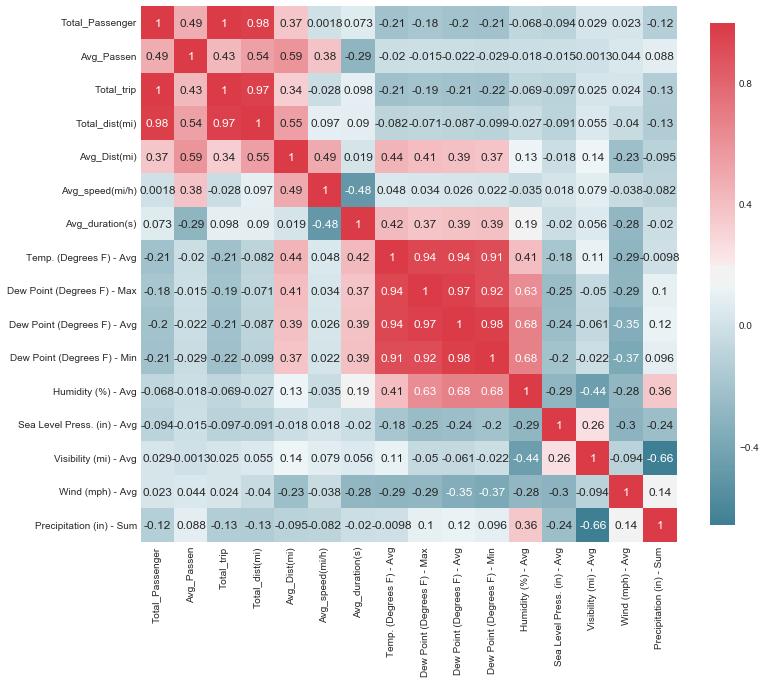

In [70]:
plot_correlation_map(result)